In [8]:
import numpy
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from causality.inference.search import IC
from causality.inference.independence_tests import RobustRegressionTest

import matplotlib.pyplot as pp
from causality.analysis.dataframe import CausalDataFrame

In [9]:
mdf=pd.read_pickle("./dataset/nmdf.pkl")

In [10]:
mdf.shape

(2998, 11)

In [11]:
mdf.iloc[0]

mg                              caGrQc-0K-1
mean_cv_f1                         0.797157
nodes                                  5220
edges                                 14496
density                          0.00106419
assortativity                    0.00313595
transitivity                     0.00122885
average_shortest_path_length        5.19442
degree-1                          0.0243295
g                                    caGrQc
smg                                      0K
Name: 0, dtype: object

In [12]:
variable_types = {'mean_cv_f1' : 'c', 'density' : 'c', 'assortativity' : 'c', 'transitivity' : 'c', 'average_shortest_path_length' : 'c','degree-1':'c'}

In [13]:
# run the search
ic_algorithm = IC(RobustRegressionTest)
graph = ic_algorithm.search(mdf, variable_types)

In [14]:
graph.edges(data=True)

EdgeDataView([('density', 'mean_cv_f1', {'arrows': ['density', 'mean_cv_f1', 'mean_cv_f1'], 'marked': False}), ('density', 'assortativity', {'arrows': ['density', 'assortativity'], 'marked': False}), ('density', 'transitivity', {'arrows': ['density'], 'marked': True}), ('assortativity', 'transitivity', {'arrows': ['assortativity', 'transitivity', 'transitivity'], 'marked': False}), ('assortativity', 'degree-1', {'arrows': ['assortativity', 'assortativity', 'degree-1'], 'marked': False}), ('mean_cv_f1', 'average_shortest_path_length', {'arrows': ['mean_cv_f1'], 'marked': False}), ('mean_cv_f1', 'transitivity', {'arrows': ['mean_cv_f1', 'transitivity'], 'marked': False}), ('mean_cv_f1', 'degree-1', {'arrows': ['mean_cv_f1', 'mean_cv_f1', 'degree-1'], 'marked': False}), ('average_shortest_path_length', 'transitivity', {'arrows': ['transitivity'], 'marked': False})])

In [16]:
from colour import Color

def get_color_range(n, output_type='hex'):
    red = Color('red')
    blue = Color('blue')
    color_range = list(red.range_to(blue, n))
    if output_type == 'hex':
        return [c.get_hex_l() for c in color_range]
    else:
        return [c.get_rgb() for c in color_range]
        
n_nodes = len(graph.nodes())
n_colors = get_color_range(n_nodes)

In [17]:
# Sanitize graph edgges: remove duplicated arrows
sanitized_edges = []
for t in graph.edges(data=True):
    attr = t[2]
    attr['arrows'] = list(set(attr['arrows']))
    sanitized_edges.append((t[0], t[1], attr))

In [21]:
sanitized_edges

[('density',
  'mean_cv_f1',
  {'arrows': ['mean_cv_f1', 'density'], 'marked': False}),
 ('density',
  'assortativity',
  {'arrows': ['assortativity', 'density'], 'marked': False}),
 ('density', 'transitivity', {'arrows': ['density'], 'marked': True}),
 ('assortativity',
  'transitivity',
  {'arrows': ['assortativity', 'transitivity'], 'marked': False}),
 ('assortativity',
  'degree-1',
  {'arrows': ['assortativity', 'degree-1'], 'marked': False}),
 ('mean_cv_f1',
  'average_shortest_path_length',
  {'arrows': ['mean_cv_f1'], 'marked': False}),
 ('mean_cv_f1',
  'transitivity',
  {'arrows': ['mean_cv_f1', 'transitivity'], 'marked': False}),
 ('mean_cv_f1',
  'degree-1',
  {'arrows': ['mean_cv_f1', 'degree-1'], 'marked': False}),
 ('average_shortest_path_length',
  'transitivity',
  {'arrows': ['transitivity'], 'marked': False})]

In [18]:
edge_labels = [((u,v,),'CAUSAL') if d['marked'] else ((u,v,),'') for u,v,d in graph.edges(data=True)]
edge_labels = dict(edge_labels)

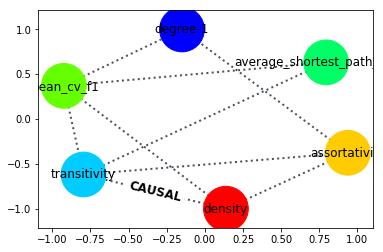

In [28]:
G=graph
pos = nx.spring_layout(G, k=2000, iterations=1000)

# Add nodes
nx.draw_networkx_nodes(G, pos, node_color=n_colors, node_size=2000)

# Add labels to nodes
nx.draw_networkx_labels(G, pos, font_size=12,arrows=True)

# Add edges
nx.draw_networkx_edges(G, pos, edgelist=sanitized_edges,
                       width=2.0,
                       edge_color='#1C2833',
                       style='dotted', 
                       alpha=0.8,
                       arrows=True)

# Add labels to edges
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,
                             font_size=12,
                             font_weight='bold')

# plt.draw()
plt.show()

In [8]:
G=graph.to_directed()

In [8]:
G=graph.to_directed()

In [12]:
A = nx.nx_agraph.to_agraph(graph)        # convert to a graphviz graph
A.layout()            # neato layout
A.draw("k5.png")

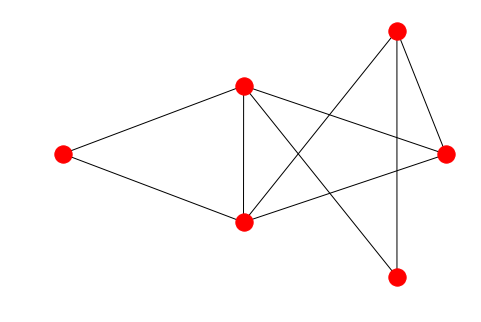

In [16]:
arcs = nx.draw_kamada_kawai(graph,arrows=True)

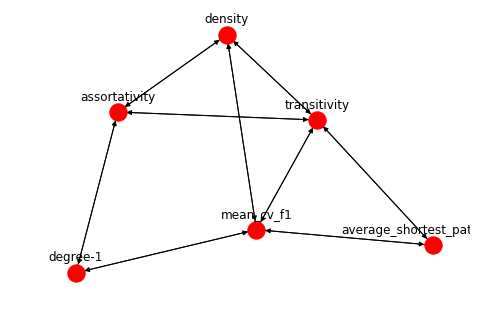

In [28]:
pos = nx.spring_layout(G)
nx.draw(G, pos, font_size=16, with_labels=False,arrows=True)
for p in pos:  # raise text positions
    pos[p][1] += 0.08
nx.draw_networkx_labels(G, pos)
plt.show()

In [24]:
G

In [29]:
cdf = CausalDataFrame(mdf)

In [30]:
cdf.head()

,mg,mean_cv_f1,nodes,edges,density,assortativity,transitivity,average_shortest_path_length,degree-1,g,smg
0,caGrQc-0K-1,0.797157,5220,14496,0.001064,0.003136,0.001229,5.194418,0.024330,caGrQc,0K
1,caGrQc-0K-10,0.788594,5213,14496,0.001067,-0.007209,0.001013,5.945370,0.021485,caGrQc,0K
2,caGrQc-0K-100,0.791992,5215,14496,0.001066,-0.002989,0.000969,5.189733,0.020901,caGrQc,0K
3,caGrQc-0K-11,0.802175,5220,14496,0.001064,0.003136,0.001229,5.194418,0.024330,caGrQc,0K
4,caGrQc-0K-12,0.797260,5225,14496,0.001062,0.000393,0.000897,5.197192,0.022010,caGrQc,0K


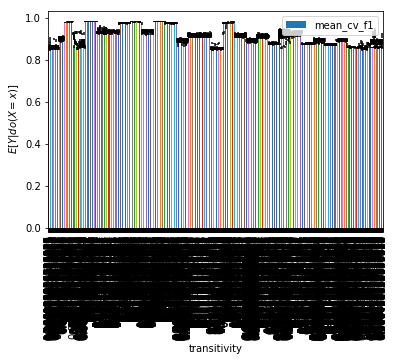

In [31]:
cdf.zplot(x='transitivity', y='mean_cv_f1', z_types={'assortativity': 'c'}, z=['assortativity'], kind='bar', bootstrap_samples=10); 
pp.ylabel("$E[Y|do(X=x)]$"); 
pp.show()